In [1190]:
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn import tree
from IPython.display import Image
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score


In [1191]:
# READ THE DATA
race_data = pd.read_csv("svm_racedata.csv")

In [1192]:
#PRINT ITS SHAPE AND COLUMN NAMES
print(race_data.shape)
print(race_data.columns)

(18, 8)
Index(['Unnamed: 0', 'White', 'Black_or_African_American',
       'American_Indian_or_Alaska_Native', 'Asian',
       'Native_Hawaiian_or_Other_Pacific_Islander', 'Unknown', 'category'],
      dtype='object')


In [1193]:
#CLEAN THE DATA
#REMOVE THE FIRST COLUMN
race_data = race_data.drop(columns=['Unnamed: 0'])
#CHECK FOR MISSING VALUES
race_data.isnull().sum()

White                                        0
Black_or_African_American                    0
American_Indian_or_Alaska_Native             0
Asian                                        0
Native_Hawaiian_or_Other_Pacific_Islander    0
Unknown                                      0
category                                     0
dtype: int64

In [1194]:
#SUMMARIZE THE DATA
df_describe = race_data.describe().loc[['min','mean','max']]
df_dtype = race_data.dtypes
df_describe = df_describe.append(df_dtype,ignore_index=True)
df_describe = df_describe.rename(index={0:'min',1:'mean',2:'max',3:'dtype'})
df_describe = df_describe.transpose()
print(df_describe)


                                             min            mean        max  \
White                                      459.0  1509511.888889  5372573.0   
Black_or_African_American                   60.0   648793.833333  2088414.0   
American_Indian_or_Alaska_Native             9.0         27830.5    86370.0   
Asian                                        8.0    42430.166667   166046.0   
Native_Hawaiian_or_Other_Pacific_Islander    0.0     5009.888889    16887.0   
Unknown                                     35.0   134815.111111   537555.0   
category                                     NaN             NaN        NaN   

                                            dtype  
White                                       int64  
Black_or_African_American                   int64  
American_Indian_or_Alaska_Native            int64  
Asian                                       int64  
Native_Hawaiian_or_Other_Pacific_Islander   int64  
Unknown                                     int64  
cat

/var/folders/yc/mphc0tn16cx2tqhspm90bcg80000gn/T/ipykernel_53561/3609106667.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_describe = df_describe.append(df_dtype,ignore_index=True)


In [1195]:
#THE LOAD BALANCE AND COUNT THE NUMBER OF SAMPLES FOR EACH CATEGORY
from locale import normalize

category_white_count = race_data['category'].value_counts()['White']
category_black_count = race_data['category'].value_counts()['Black_or_African_American']
category_white_norm = race_data['category'].value_counts(normalize = True)['White']
category_black_norm = race_data['category'].value_counts(normalize = True)['Black_or_African_American']

print("Number of points with category white: {0:2d} {1:}".format(category_white_count, category_white_norm))
print("Number of points with category black: {0:2d} {1:}".format(category_black_count, category_black_norm))

Number of points with category white:  8 0.4444444444444444
Number of points with category black: 10 0.5555555555555556


In [1196]:
#MAKE DATA-FRAMES (or numpy arrays) (X,Y) WHERE Y="category" COLUMN and X="everything else"
X = race_data.drop(columns = ['category'])
Y = race_data['category']

In [1197]:
#PARTITION THE DATASET INTO TRAINING AND TEST SETS
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, train_size=.52, random_state=2)

In [1198]:
#CONSISTENCY CHECK
print(type(x_train))
print(x_train.shape)
print(type(y_train))
print(y_train.shape)
print(type(x_test))
print(x_test.shape)
print(type(y_test))
print(y_test.shape)

<class 'pandas.core.frame.DataFrame'>
(9, 6)
<class 'pandas.core.series.Series'>
(9,)
<class 'pandas.core.frame.DataFrame'>
(9, 6)
<class 'pandas.core.series.Series'>
(9,)


In [1199]:
# TRAIN A SKLEARN DECISION TREE MODEL ON x_train,y_train 
from sklearn import tree
model = tree.DecisionTreeClassifier()
model = model.fit(x_train, y_train)

In [1200]:
#MAKE PREDICTIONS FOR THE TRAINING AND TEST SET 
yp_train = model.predict(x_train)
yp_test = model.predict(x_test)

In [1201]:
#CONFUSION MATRIX 
from sklearn.metrics import confusion_matrix


def confusion_plot(y_data,y_pred):
    cm = confusion_matrix(y_data, y_pred)
    print('ACCURACY: {:.2f}'.format(accuracy_score(y_data, y_pred)))
    print('NEGATIVE RECALL (Y=0): {:.2f}'.format(recall_score(y_data, y_pred, pos_label='White')))
    print('NEGATIVE PRECISION (Y=0): {:.2f}'.format(precision_score(y_data, y_pred, pos_label='White')))
    print('POSITIVE RECALL (Y=1): {:.2f}'.format(recall_score(y_data, y_pred, pos_label='White')))
    print('POSITIVE PRECISION (Y=1): {:.2f}'.format(precision_score(y_data, y_pred, pos_label='Black_or_African_American')))
    print(cm)
    plt.figure(figsize=(10,10))
    sns.heatmap(cm, annot=True, fmt="d",cmap=cmap, )
    plt.title('Confusion matrix')
    plt.ylabel('Actual label')
    plt.xlabel('Predicted label')
    plt.show()

------TEST------
ACCURACY: 0.89
NEGATIVE RECALL (Y=0): 0.80
NEGATIVE PRECISION (Y=0): 1.00
POSITIVE RECALL (Y=1): 0.80
POSITIVE PRECISION (Y=1): 0.80
[[4 0]
 [1 4]]


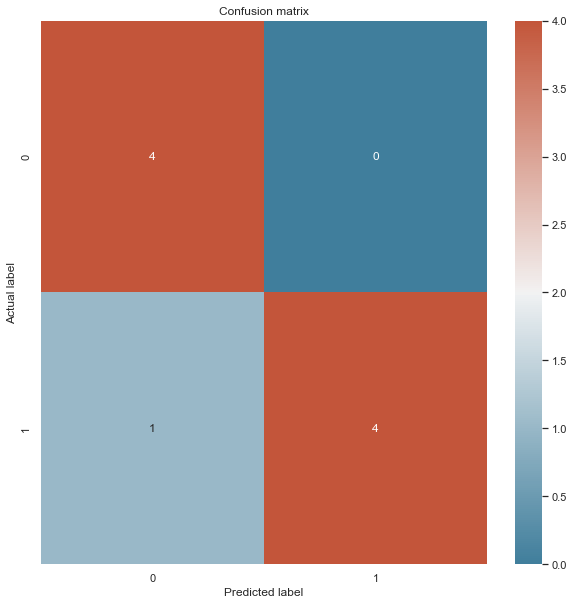

In [1202]:
#TEST SET CONFUSION MATRIX
print("------TEST------")
confusion_plot(y_test,yp_test)


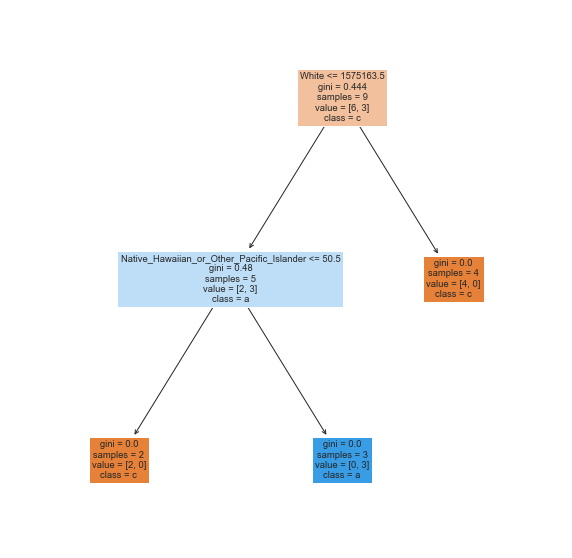

In [1203]:
# VISUALIZE THE DECISION TREE 
def plot_tree(model,X,Y):
    plt.figure(figsize=(10,10))
    tree.plot_tree(model, feature_names=X.columns, class_names=Y.name, filled=True)
    plt.show()

plot_tree(model,X,Y)

In [1204]:
#HYPER-PARAMETERS VALUES
test_results=[]
train_results=[]

for num_layer in range(1,17):
    model = tree.DecisionTreeClassifier(max_depth=num_layer)
    model = model.fit(x_train, y_train)

    yp_train=model.predict(x_train)
    yp_test=model.predict(x_test)

    # print(y_pred.shape)
    test_results.append([num_layer,accuracy_score(y_test, yp_test),recall_score(y_test, yp_test,pos_label='White'),recall_score(y_test, yp_test,pos_label='Black_or_African_American')])
    train_results.append([num_layer,accuracy_score(y_train, yp_train),recall_score(y_train, yp_train,pos_label='White'),recall_score(y_train, yp_train,pos_label='Black_or_African_American')])



In [1205]:
#### TRAIN A SKLEARN DECISION TREE MODEL ON x_train,y_train 
from sklearn import tree
model = tree.DecisionTreeClassifier(max_depth=5)
model = model.fit(x_train, y_train)

yp_train=model.predict(x_train)
yp_test=model.predict(x_test)

------TEST------
ACCURACY: 0.89
NEGATIVE RECALL (Y=0): 0.80
NEGATIVE PRECISION (Y=0): 1.00
POSITIVE RECALL (Y=1): 0.80
POSITIVE PRECISION (Y=1): 0.80
[[4 0]
 [1 4]]


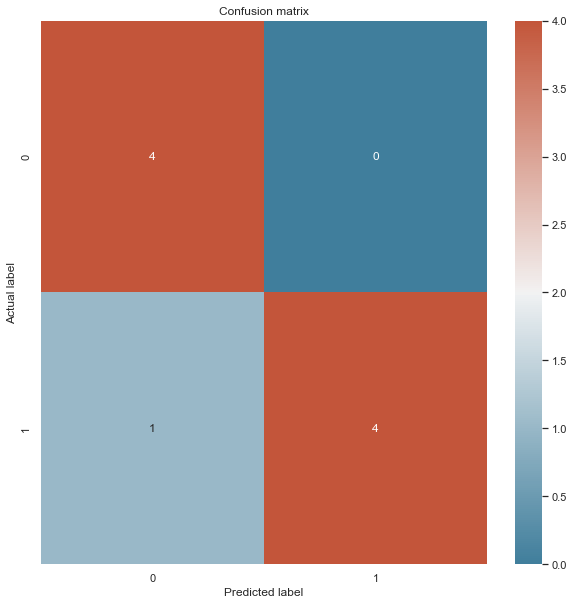

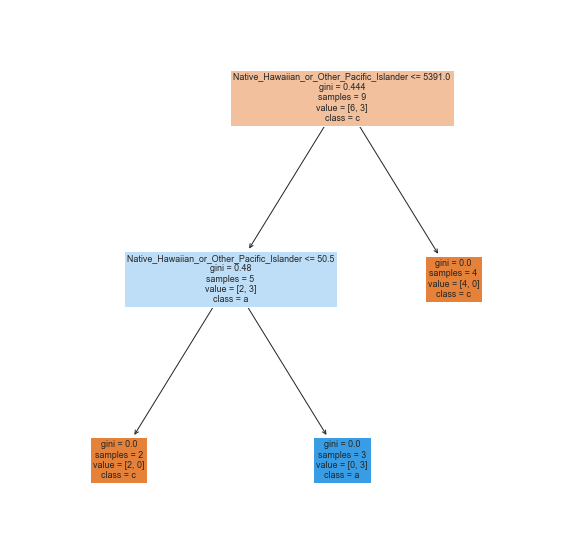

In [1206]:
# EVALUATE THE MODEL ON THE TEST SET
print("------TEST------")
confusion_plot(y_test,yp_test)

plot_tree(model,X,Y)